In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
documents = ["This little kitty came to play when I was eating at a restaurant.",
 "Merley has the best squooshy kitten belly.",
 "Google Translate app is incredible.",
 "If you open 100 tab in google you get a smiley face.",
 "Best cat photo I've ever taken.",
 "Climbing ninja cat.",
 "Impressed with google map feedback.",
 "Key promoter extension for Google Chrome."]


In [2]:
vectorizer = TfidfVectorizer(stop_words='english') 
X = vectorizer.fit_transform(documents)
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()


Top terms per cluster:


C:\Users\aksha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [3]:
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print
    print("\n")
print("Prediction") 
Y = vectorizer.transform(["chrome browser to open."])
prediction = model.predict(Y)
print(prediction) 
Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)

Cluster 0:
 cat
 best
 climbing
 ninja
 ve
 photo
 taken
 belly
 merley
 kitten


Cluster 1:
 google
 feedback
 map
 app
 impressed
 incredible
 translate
 key
 extension
 chrome


Prediction
[1]
[0]


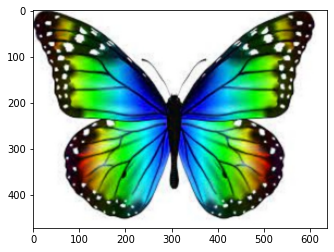

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
# Read in the image
image = cv2.imread('butterfly.png')
plt.imshow(image)


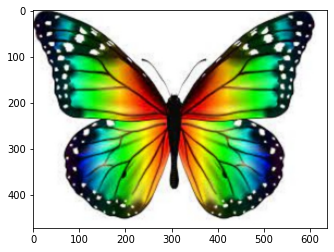

In [5]:
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [6]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
# Convert to float type
pixel_vals = np.float32(pixel_vals)

In [7]:
#the below line of code defines the criteria for the algorithm to stop runni
#which will happen is 100 iterations are run or the epsilon (which is the re
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
# then perform k-means clustering wit h number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

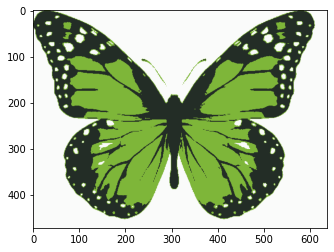

In [8]:
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
plt.imshow(segmented_image)


In [9]:
#the below line of code defines the criteria for the algorithm to stop runni
#which will happen is 100 iterations are run or the epsilon (which is the re
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
# then perform k-means clustering wit h number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 6
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

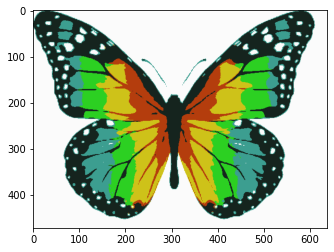

In [10]:
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
plt.imshow(segmented_image)